## IMPORTS

In [1]:
import numpy as np
import pandas as pd 
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import altair_ally as aly

## EDA

In [2]:
df = pd.read_csv("data/raw/pretransformed_heart_disease.csv")
df.head()

,Age (in years),Sex,Chest pain type,Resting blood pressure (in mm Hg on admission to the hospital),Serum cholesterol (in mg/dl),Fasting blood sugar > 120 mg/dl,Resting electrocardiographic results,Maximum heart rate achieved,Exercise-induced angina,ST depression induced by exercise relative to rest,Slope of the peak exercise ST segment,Number of major vessels (0–3) colored by fluoroscopy,Thalassemia,Diagnosis of heart disease
0,63,male,typical angina,145,233,True,showing probable or definite left ventricular ...,150,no,2.3,downsloping,0.0,fixed defect,< 50% diameter narrowing
1,67,male,asymptomatic,120,229,False,showing probable or definite left ventricular ...,129,yes,2.6,flat,2.0,reversable defect,> 50% diameter narrowing
2,37,male,non-anginal pain,130,250,False,normal,187,no,3.5,downsloping,0.0,normal,< 50% diameter narrowing
3,41,female,atypical angina,130,204,False,showing probable or definite left ventricular ...,172,no,1.4,upsloping,0.0,normal,< 50% diameter narrowing
4,56,male,atypical angina,120,236,False,normal,178,no,0.8,upsloping,0.0,normal,< 50% diameter narrowing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age (in years)                                                  219 non-null    int64  
 1   Sex                                                             219 non-null    object 
 2   Chest pain type                                                 219 non-null    object 
 3   Resting blood pressure (in mm Hg on admission to the hospital)  219 non-null    int64  
 4   Serum cholesterol (in mg/dl)                                    219 non-null    int64  
 5   Fasting blood sugar > 120 mg/dl                                 219 non-null    bool   
 6   Resting electrocardiographic results                            219 non-null    object 
 7   Maximum heart rate achieved                          

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [5]:
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('html')

RendererRegistry.enable('html')

In [6]:
# Univariate distrbution for the quantitative variables
numeric_columns = [
    'age_(in_years)', 
    'resting_blood_pressure_(in_mm_hg_on_admission_to_the_hospital)', 
    'serum_cholesterol_(in_mg/dl)', 
    'maximum_heart_rate_achieved'
]

aly.alt.data_transformers.enable('vegafusion')


aly.dist(df[numeric_columns + ['diagnosis_of_heart_disease']], color='diagnosis_of_heart_disease')

alt.ConcatChart(...)

**Analysis of Quantitative Variables**

**1. Maximum Heart Rate Achieved**
- Patients with `<50% diameter narrowing` have higher maximum heart rates compared to `>50% diameter narrowing`.
- Severe heart disease may reduce maximum heart rate capabilities.

**2. Serum Cholesterol (mg/dL)**
- Distributions are similar across both groups.
- Cholesterol alone may not distinguish heart disease severity.

**3. Resting Blood Pressure (mm Hg)**
- Slightly higher resting blood pressure observed in `>50% diameter narrowing`.
- May not be a strong independent predictor due to overlap.

**4. Age (Years)**
- Older patients are more likely to belong to the `>50% diameter narrowing` group.
- Age is a potential risk factor for severe heart disease.


In [7]:
categorical_columns = [
    'sex', 
    'chest_pain_type', 
    'fasting_blood_sugar_>_120_mg/dl', 
    'resting_electrocardiographic_results',
    'exercise-induced_angina', 
    'slope_of_the_peak_exercise_st_segment', 
    'thalassemia'
]

# Visualize the distributions for the categorical variables colored by 'diagnosis_of_heart_disease'
aly.dist(
    df[categorical_columns + ['diagnosis_of_heart_disease']]
    .assign(diagnosis_of_heart_disease=lambda x: x['diagnosis_of_heart_disease'].astype(object)), 
    dtype='object', 
    color='diagnosis_of_heart_disease'
)

alt.ConcatChart(...)

**Analysis of Categorical Variables**

**1. Sex**
- Males dominate both groups, but females are more prevalent in `<50% diameter narrowing`.

**2. Exercise-Induced Angina**
- `No angina` is more common in `<50%`, while `Yes angina` is prominent in `>50%`.

**3. Resting Electrocardiographic Results**
- `Normal` results dominate `<50%`, while `ST-T wave abnormality` is common in `>50%`.

**4. Slope of the Peak Exercise ST Segment**
- `Upsloping` is frequent in `<50%`, whereas `Flat slope` is linked to `>50%`.

**5. Thalassemia**
- `Normal` is prevalent in `<50%`, and `Reversible defect` is more frequent in `>50%`.

**6. Chest Pain Type**
- `Asymptomatic` pain is common in `>50%`, while other types are evenly distributed.



In [8]:
# Visualize pairwise correlations for the quantitative variables
aly.corr(df[numeric_columns])

alt.ConcatChart(...)

- **Maximum Heart Rate Achieved:**
  - Negatively correlated with `age (in years)` in both Pearson and Spearman correlations, suggesting that maximum heart rate decreases with age.
- **Serum Cholesterol (in mg/dL):**
  - Weak correlations with other variables, indicating that cholesterol may not strongly relate to other numeric features.
- **Resting Blood Pressure (in mm Hg):**
  - Slight positive correlation with `age (in years)` but weak overall relationships with other variables.

- **Strongest Correlation:**
  - Maximum heart rate achieved shows the most meaningful relationship, particularly with age.
- **Weak Predictors:**
  - Serum cholesterol and resting blood pressure exhibit weak correlations across variables.


In [9]:
# Select numeric columns with high correlations
columns_with_at_least_one_high_corr = [
    'age_(in_years)',
    'resting_blood_pressure_(in_mm_hg_on_admission_to_the_hospital)',
    'serum_cholesterol_(in_mg/dl)',
    'maximum_heart_rate_achieved',
    'diagnosis_of_heart_disease'  # Always interesting to include the target
]

sample_size = min(len(df), 300)

aly.pair(
    df[columns_with_at_least_one_high_corr].sample(sample_size),
    color='diagnosis_of_heart_disease'
)


alt.VConcatChart(...)

- **Age vs. Maximum Heart Rate Achieved:**
  - A negative trend is visible, with older individuals achieving lower maximum heart rates.
  - This relationship appears consistent across both `<50%` and `>50% diameter narrowing`.

- **Resting Blood Pressure vs. Age:**
  - Weak positive trend suggesting older individuals might have slightly higher resting blood pressure.
  - The distribution overlaps significantly between `<50%` and `>50% diameter narrowing`.

- **Serum Cholesterol vs. Resting Blood Pressure:**
  - No clear trend is visible, indicating little to no relationship between these variables.

- **Serum Cholesterol vs. Diagnosis:**
  - Overlapping distributions suggest serum cholesterol is not a strong differentiator for heart disease severity.

**Insights:**
- **Strongest Patterns:**
  - The negative correlation between age and maximum heart rate achieved is notable.
- **Weak Predictors:**
  - Serum cholesterol and resting blood pressure show weak or no significant trends.


## ML-analysis (code)

In [10]:
# Import modules
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
from sklearn.model_selection import RandomizedSearchCV, cross_validate, train_test_split

In [11]:
#Import data
data = pd.read_csv('data/raw/pretransformed_heart_disease.csv')
data.head()

,Age (in years),Sex,Chest pain type,Resting blood pressure (in mm Hg on admission to the hospital),Serum cholesterol (in mg/dl),Fasting blood sugar > 120 mg/dl,Resting electrocardiographic results,Maximum heart rate achieved,Exercise-induced angina,ST depression induced by exercise relative to rest,Slope of the peak exercise ST segment,Number of major vessels (0–3) colored by fluoroscopy,Thalassemia,Diagnosis of heart disease
0,63,male,typical angina,145,233,True,showing probable or definite left ventricular ...,150,no,2.3,downsloping,0.0,fixed defect,< 50% diameter narrowing
1,67,male,asymptomatic,120,229,False,showing probable or definite left ventricular ...,129,yes,2.6,flat,2.0,reversable defect,> 50% diameter narrowing
2,37,male,non-anginal pain,130,250,False,normal,187,no,3.5,downsloping,0.0,normal,< 50% diameter narrowing
3,41,female,atypical angina,130,204,False,showing probable or definite left ventricular ...,172,no,1.4,upsloping,0.0,normal,< 50% diameter narrowing
4,56,male,atypical angina,120,236,False,normal,178,no,0.8,upsloping,0.0,normal,< 50% diameter narrowing


In [12]:
# Transform target column to True/False with new label of 
# '> 50% diameter narrowing'

data['Diagnosis of heart disease'] = data['Diagnosis of heart disease'].replace({'< 50% diameter narrowing': False, '> 50% diameter narrowing': True})
data.rename(columns={'Diagnosis of heart disease': '> 50% diameter narrowing'}, inplace=True)
data.head()

/var/folders/_t/2rjzjv3s23l1_dby_gl3_8600000gn/T/ipykernel_27318/948054868.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Diagnosis of heart disease'] = data['Diagnosis of heart disease'].replace({'< 50% diameter narrowing': False, '> 50% diameter narrowing': True})


,Age (in years),Sex,Chest pain type,Resting blood pressure (in mm Hg on admission to the hospital),Serum cholesterol (in mg/dl),Fasting blood sugar > 120 mg/dl,Resting electrocardiographic results,Maximum heart rate achieved,Exercise-induced angina,ST depression induced by exercise relative to rest,Slope of the peak exercise ST segment,Number of major vessels (0–3) colored by fluoroscopy,Thalassemia,> 50% diameter narrowing
0,63,male,typical angina,145,233,True,showing probable or definite left ventricular ...,150,no,2.3,downsloping,0.0,fixed defect,False
1,67,male,asymptomatic,120,229,False,showing probable or definite left ventricular ...,129,yes,2.6,flat,2.0,reversable defect,True
2,37,male,non-anginal pain,130,250,False,normal,187,no,3.5,downsloping,0.0,normal,False
3,41,female,atypical angina,130,204,False,showing probable or definite left ventricular ...,172,no,1.4,upsloping,0.0,normal,False
4,56,male,atypical angina,120,236,False,normal,178,no,0.8,upsloping,0.0,normal,False


In [13]:
train_df, test_df = train_test_split(data, test_size=0.1)

X_train = train_df.drop('> 50% diameter narrowing', axis=1)
y_train = train_df['> 50% diameter narrowing']
X_test = test_df.drop('> 50% diameter narrowing', axis=1)
y_test = test_df['> 50% diameter narrowing']

In [14]:
# Lists of feature names
categorical_features = ['Sex', 
                        'Chest pain type', 
                        'Fasting blood sugar > 120 mg/dl', 
                        'Resting electrocardiographic results', 
                        'Exercise-induced angina', 
                        'Slope of the peak exercise ST segment', 
                        'Thalassemia']
numeric_features = list(set(X_train.columns) - set(categorical_features))

# Create transformer pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", drop='if_binary', dtype=int, sparse_output=False),
)

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median", fill_value="missing"),
    StandardScaler(),
)

# Create the column transformer
preprocessor = make_column_transformer(
    (categorical_transformer, categorical_features),
    (numeric_transformer, numeric_features),
)
# Show the preprocessor
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Chest pain type',
                                  'Fasting blood sugar > 120 mg/dl',
                                  'Resting electrocardiographic results',
                                  'Exer...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age (in years)',
                                  'ST depression induced by exercise relative '
                                  'to rest',
                                  'Serum cholesterol (in mg/dl)',
                                  'Resting blood pressure (in mm Hg on '
                                  'admission to the hospital)',
                                  'Maximum heart rate achieved',
                                  'Number of major vessels (0–3) colored by '
                                  'fluoroscopy'])])

In [15]:
# 0. Dummy model
# Imports
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (make_scorer, 
                            precision_score,
                            recall_score,
                            f1_score)

classification_metrics = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, pos_label=True),
    "recall": make_scorer(recall_score, pos_label=True),
    "f1": make_scorer(f1_score, pos_label=True),
}

# The dummy model
dc = make_pipeline(preprocessor, DummyClassifier())
# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results = {}
cross_val_results['dummy'] = pd.DataFrame(cross_validate(dc, 
                                                         X_train, 
                                                         y_train, 
                                                         cv=5, 
                                                         scoring=classification_metrics,
                                                         )).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['dummy']

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

,mean,std
fit_time,0.004,0.001
score_time,0.005,0.001
test_accuracy,0.746,0.004
test_precision,0.000,0.000
test_recall,0.000,0.000
test_f1,0.000,0.000


In [16]:
# 1. Logistic Regression model

# The logreg model pipeline
logreg = make_pipeline(preprocessor, LogisticRegression(random_state=123, max_iter=1000))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['logreg'] = pd.DataFrame(cross_validate(logreg, 
                                                          X_train, 
                                                          y_train, 
                                                          cv=5, 
                                                          scoring=classification_metrics, 
                                                          return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['logreg'] 

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.006,0.001
score_time,0.004,0.000
test_accuracy,0.762,0.052
train_accuracy,0.834,0.018
test_precision,0.536,0.134
train_precision,0.751,0.037
test_recall,0.400,0.122
train_recall,0.515,0.055
test_f1,0.458,0.128
train_f1,0.610,0.050


In [17]:
# 2. Support vector classifier
# Imports
from sklearn.svm import SVC

# The svc model pipeline
svc = make_pipeline(preprocessor, SVC(random_state=123))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['svc'] = pd.DataFrame(cross_validate(svc, 
                                                      X_train, 
                                                      y_train, 
                                                      cv=5, 
                                                      scoring=classification_metrics, 
                                                      return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['svc'] 

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.005,0.001
score_time,0.004,0.000
test_accuracy,0.797,0.018
train_accuracy,0.882,0.009
test_precision,0.843,0.151
train_precision,0.974,0.024
test_recall,0.260,0.089
train_recall,0.550,0.031
test_f1,0.387,0.094
train_f1,0.703,0.026


/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


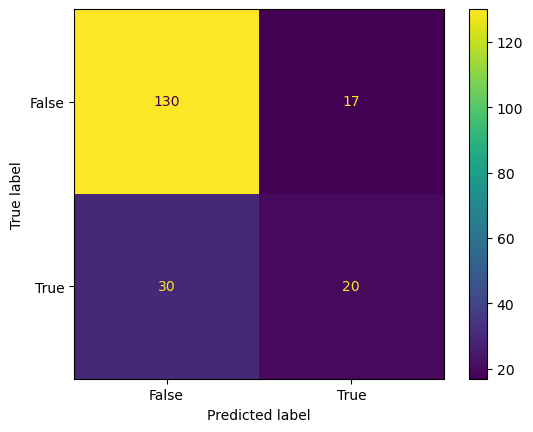

In [18]:
# 3. Confusion matrix for the logistic regression
# Imports
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

confmat_logreg = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(logreg, X_train, y_train),
    values_format='d'
)
# Show the matrix
confmat_logreg

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


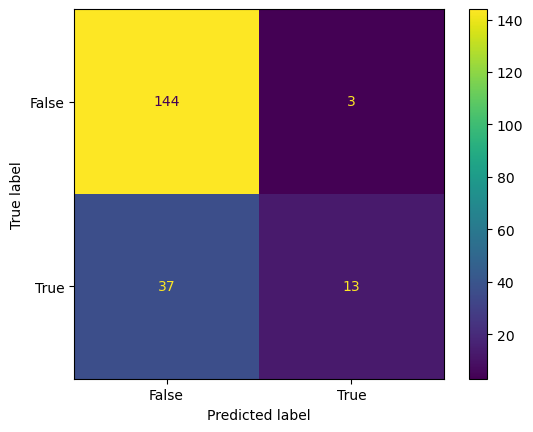

In [19]:
# 3. Confusion matrix for the SVC
confmat_svc = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(svc, X_train, y_train),
    values_format='d',
)
# Show the matrix
confmat_svc

In [20]:
# 4. Balanced logistic regression
# The logreg model pipeline
logreg_bal = make_pipeline(preprocessor, LogisticRegression(random_state=123, max_iter=1000, class_weight="balanced"))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['logreg_bal'] = pd.DataFrame(cross_validate(logreg_bal, 
                                                        X_train, 
                                                        y_train, 
                                                        cv=5, 
                                                        scoring=classification_metrics,
                                                        return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['logreg_bal'] 

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.006,0.001
score_time,0.004,0.000
test_accuracy,0.736,0.048
train_accuracy,0.797,0.017
test_precision,0.488,0.072
train_precision,0.571,0.025
test_recall,0.660,0.114
train_recall,0.810,0.042
test_f1,0.559,0.080
train_f1,0.669,0.024


In [21]:
# 5. Balanced support vector classifier
# The svc model pipeline
svc_bal = make_pipeline(preprocessor, SVC(random_state=123, class_weight="balanced"))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['svc_bal'] = pd.DataFrame(cross_validate(svc_bal, 
                                                          X_train, 
                                                          y_train, 
                                                          cv=5, 
                                                          scoring=classification_metrics, 
                                                          return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['svc_bal'] 

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.005,0.001
score_time,0.004,0.000
test_accuracy,0.751,0.032
train_accuracy,0.911,0.009
test_precision,0.510,0.054
train_precision,0.771,0.018
test_recall,0.620,0.084
train_recall,0.925,0.018
test_f1,0.558,0.057
train_f1,0.841,0.016


/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


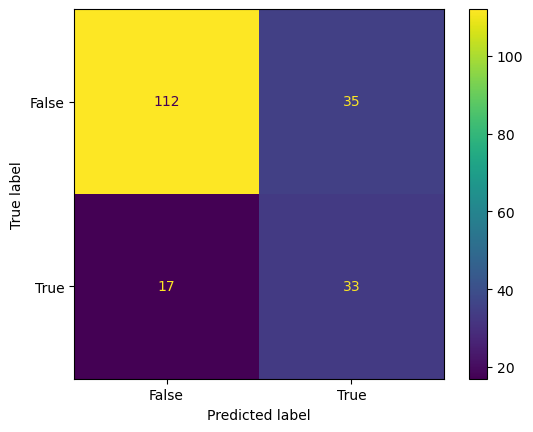

In [22]:
# 6. Confusion matrix for the balanced logistic regression

confmat_logreg_bal = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(logreg_bal, X_train, y_train),
    values_format='d'
)
# Show the matrix
confmat_logreg_bal

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


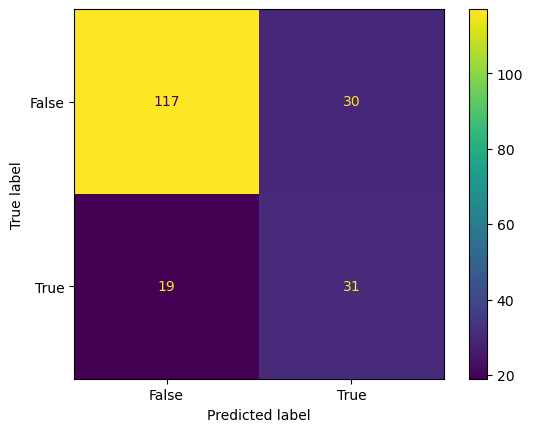

In [23]:
# 6. Confusion matrix for the balanced SVC
confmat_svc_bal = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(svc_bal, X_train, y_train),
    values_format='d'
)
# Show the matrix
confmat_svc_bal

In [24]:
# Manual check that the cross val std doesn't look way off for some model
pd.concat(
    cross_val_results,
    axis='columns'  # Get the right model names and mean/std as columns
).xs(
    'std',  # Select only the 'std' columns
    axis='columns',  # Cross-section the columns
    level=1  # The 1st level ('mean', 'std') instead of the 0th level (the model names)
).style.format(
    precision=2  # Pandas `.style` does not honor previous rounding via `.round()`
).background_gradient(
    axis=None  # Color cells based on the entire matrix rather than row/column-wise
)

,dummy,logreg,svc,logreg_bal,svc_bal
fit_time,0.00,0.00,0.00,0.00,0.00
score_time,0.00,0.00,0.00,0.00,0.00
test_accuracy,0.00,0.05,0.02,0.05,0.03
test_precision,0.00,0.13,0.15,0.07,0.05
test_recall,0.00,0.12,0.09,0.11,0.08
test_f1,0.00,0.13,0.09,0.08,0.06
train_accuracy,nan,0.02,0.01,0.02,0.01
train_precision,nan,0.04,0.02,0.03,0.02
train_recall,nan,0.06,0.03,0.04,0.02
train_f1,nan,0.05,0.03,0.02,0.02


In [25]:
# Compare the average scores of all the models
pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
).style.format(
    precision=2
).background_gradient(
    axis=None
)

,dummy,logreg,svc,logreg_bal,svc_bal
fit_time,0.00,0.01,0.01,0.01,0.01
score_time,0.01,0.00,0.00,0.00,0.00
test_accuracy,0.75,0.76,0.80,0.74,0.75
test_precision,0.00,0.54,0.84,0.49,0.51
test_recall,0.00,0.40,0.26,0.66,0.62
test_f1,0.00,0.46,0.39,0.56,0.56
train_accuracy,nan,0.83,0.88,0.80,0.91
train_precision,nan,0.75,0.97,0.57,0.77
train_recall,nan,0.52,0.55,0.81,0.93
train_f1,nan,0.61,0.70,0.67,0.84


# Comparing the metrics across models
## Balanced logistic regression yields the highest recall and with second to the highest f1_score. For this report, we choose to proceed with `LogisticRegression(class_weight="balanced")` and optimize the f1 score metric along with optimizing recall as we want to minimize False Negatives, which is more damaging in medical diagnosis than False Positives

In [26]:
# Hyperparameter optimization f1
import numpy as np

# Define parameter distributions
param_distributions = {
    'logisticregression__C': np.logspace(-5, 5, 50),  # Regularization strength
}

random_search = RandomizedSearchCV(logreg_bal, param_distributions=param_distributions,  
                                    n_iter=100, n_jobs= -1,
                                    scoring='f1',
                                    return_train_score=True,
                                    random_state=123)

random_search.fit(X_train, y_train)

/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/candyhui/miniforge3/envs/573/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.war

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              dtype=<class 'int'>,
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Sex',
                                                                                'Chest '
                                                                                'pain '
                                                                                'type',
                                                                                '...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
                   random_state=123, return_train_score=True, scoring='f1')

In [27]:
# Extract cv_results_ into a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)
top_results = results_df.sort_values(by='rank_test_score').head(3)
top_results = top_results[[
    'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'params', 
]]

# Set pandas options to display all column content
pd.set_option('display.max_colwidth', None)
top_results

,mean_train_score,std_train_score,mean_test_score,std_test_score,mean_fit_time,params
21,0.661081,0.014779,0.579072,0.075273,0.005650,{'logisticregression__C': 0.19306977288832497}
23,0.664621,0.021712,0.563177,0.072318,0.006211,{'logisticregression__C': 0.49417133613238384}
22,0.662658,0.010961,0.563177,0.072318,0.005844,{'logisticregression__C': 0.30888435964774846}


# Add  this to the analysis
The hyperparameter optimization made a difference **('mean_test_score' (0.58) compared to 'mean_test_score of cross' (0.54) of previous mean validation score)**. However, the cross-validation scores among the top three models are approximately equivalent. This suggests that the model's performance is relatively stable across the parameter space, indicating that further tuning may not yield substantial improvements.

In [28]:
# Fit and predict the test dataset with our best model
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 dtype=<class 'int'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Chest pain type',
                                                   'Fasting blood sugar > 120 '
                                                   'mg/dl',
                                                   'Re...
                                                  ['Age (in years)',
                                                   'ST depression induced by '
                                                   'exercise relative to rest',
                                                   'Serum cholesterol (in '
                                                   'mg/dl)',
                                                   'Resting blood pressure (in '
                                                   'mm Hg on admission to the '
                                                   'hospital)',
                                                   'Maximum heart rate '
                                                   'achieved',
                                                   'Number of major vessels '
                                                   '(0–3) colored by '
                                                   'fluoroscopy'])])),
                ('logisticregression',
                 LogisticRegression(C=0.19306977288832497,
                                    class_weight='balanced', max_iter=1000,
                                    random_state=123))])

In [29]:
# f1_score Metrics
from sklearn.metrics import f1_score

# Predict labels for train and test sets
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Compute precision explicitly
train_f1 = f1_score(y_train, train_predictions, average='binary')
test_f1 = f1_score(y_test, test_predictions, average='binary')

print("Random Search best model f1_score: %0.3f" % random_search.best_score_)
print("Train f1_score on the full train set: %0.3f" % train_f1)
print("Test f1_score on the full test set: %0.3f" % test_f1)

Random Search best model f1_score: 0.579
Train f1_score on the full train set: 0.621
Test f1_score on the full test set: 0.500


In [30]:
# recall Metrics
from sklearn.metrics import recall_score

# Compute precision explicitly
train_recall = recall_score(y_train, train_predictions, average='binary')
test_recall = recall_score(y_test, test_predictions, average='binary')

print("Train recall on the full train set: %0.3f" % train_recall)
print("Test recall on the full test set: %0.3f" % test_recall)

Train recall on the full train set: 0.720
Test recall on the full test set: 0.600


In [31]:
# Accuracy Metrics
random_search_best_score = random_search.best_score_
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
...

print("Train score on the full train set: %0.3f" % train_score)
print("Test score on the full test set: %0.3f" % test_score)

Train score on the full train set: 0.777
Test score on the full test set: 0.727


## Written analysis

In [32]:
#Title


In [33]:
#summary

In [34]:
#Methods / results

In [35]:
#Discussion

In [36]:
#References